## Chat GPT Link
https://chatgpt.com/share/673fcbe8-b9b8-800b-bdfe-eab26b8c9eb7

## Question 2

1. Since accuracy can measure the proportion of true results in the population, it can be used in evaluating the proportion of patients correctly diagnosed overall.

2. Since sensitivity measures the proportion of actual positives that are correctly identified, it can be used in evaluating the proportion of patients diagnosed over all the patients who have the disease.

3. Since specificity measures the proportion of actual negatives that are correctly identified, it can be used in evaluating the proportion of patients who are considered not diagonosed over all the population that do not have disease.

4. Since precision measures the proportion of positive identifications that were actually correct, it can be used in evaluating the proportion of patients who actually have disease over all the patients who are diagnosed.

## Question 3

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab.drop(columns=columns_to_remove, inplace=True, errors='ignore')
ab.dropna(inplace=True)
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')
print(ab.info())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


## Question 4

In [6]:
train_ab = ab.sample(frac=0.8, random_state=42)
test_ab = ab.drop(train_ab.index)
ab_reduced_noNaN_train = train_ab
ab_reduced_noNaN_test = test_ab
training_size = len(ab_reduced_noNaN_train)
testing_size = len(ab_reduced_noNaN_test)
(training_size, testing_size)

(255, 64)

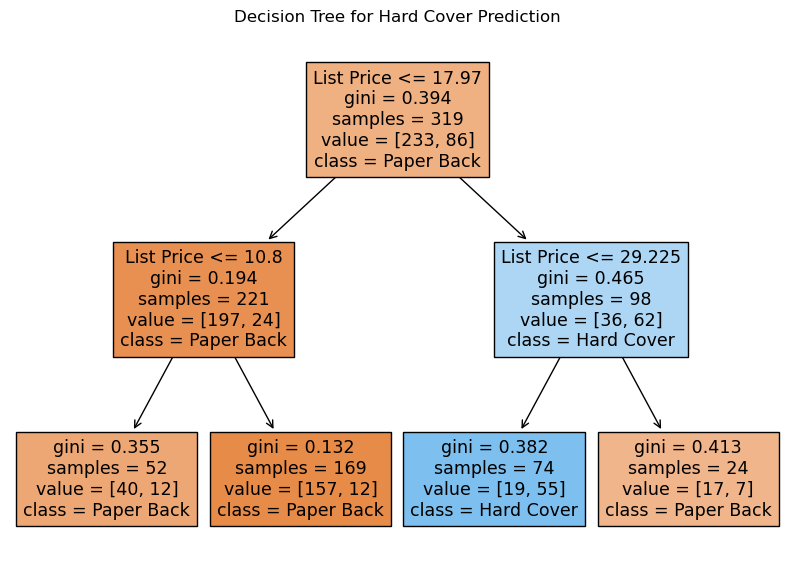

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

ab_reduced_noNaN = ab
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)
plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=['List Price'], class_names=['Paper Back', 'Hard Cover'], filled=True)
plt.title("Decision Tree for Hard Cover Prediction")
plt.show()

### Based on the List Price for the fitted clf model, we can have that: if the list price <= 17.97, the prediction is paper back; otherwise, if the list price is greater that 17.97 and less equal to 29.225, the prediction is hard cover; if the list price > 29.225, the prediction is paper back.

## Question 5

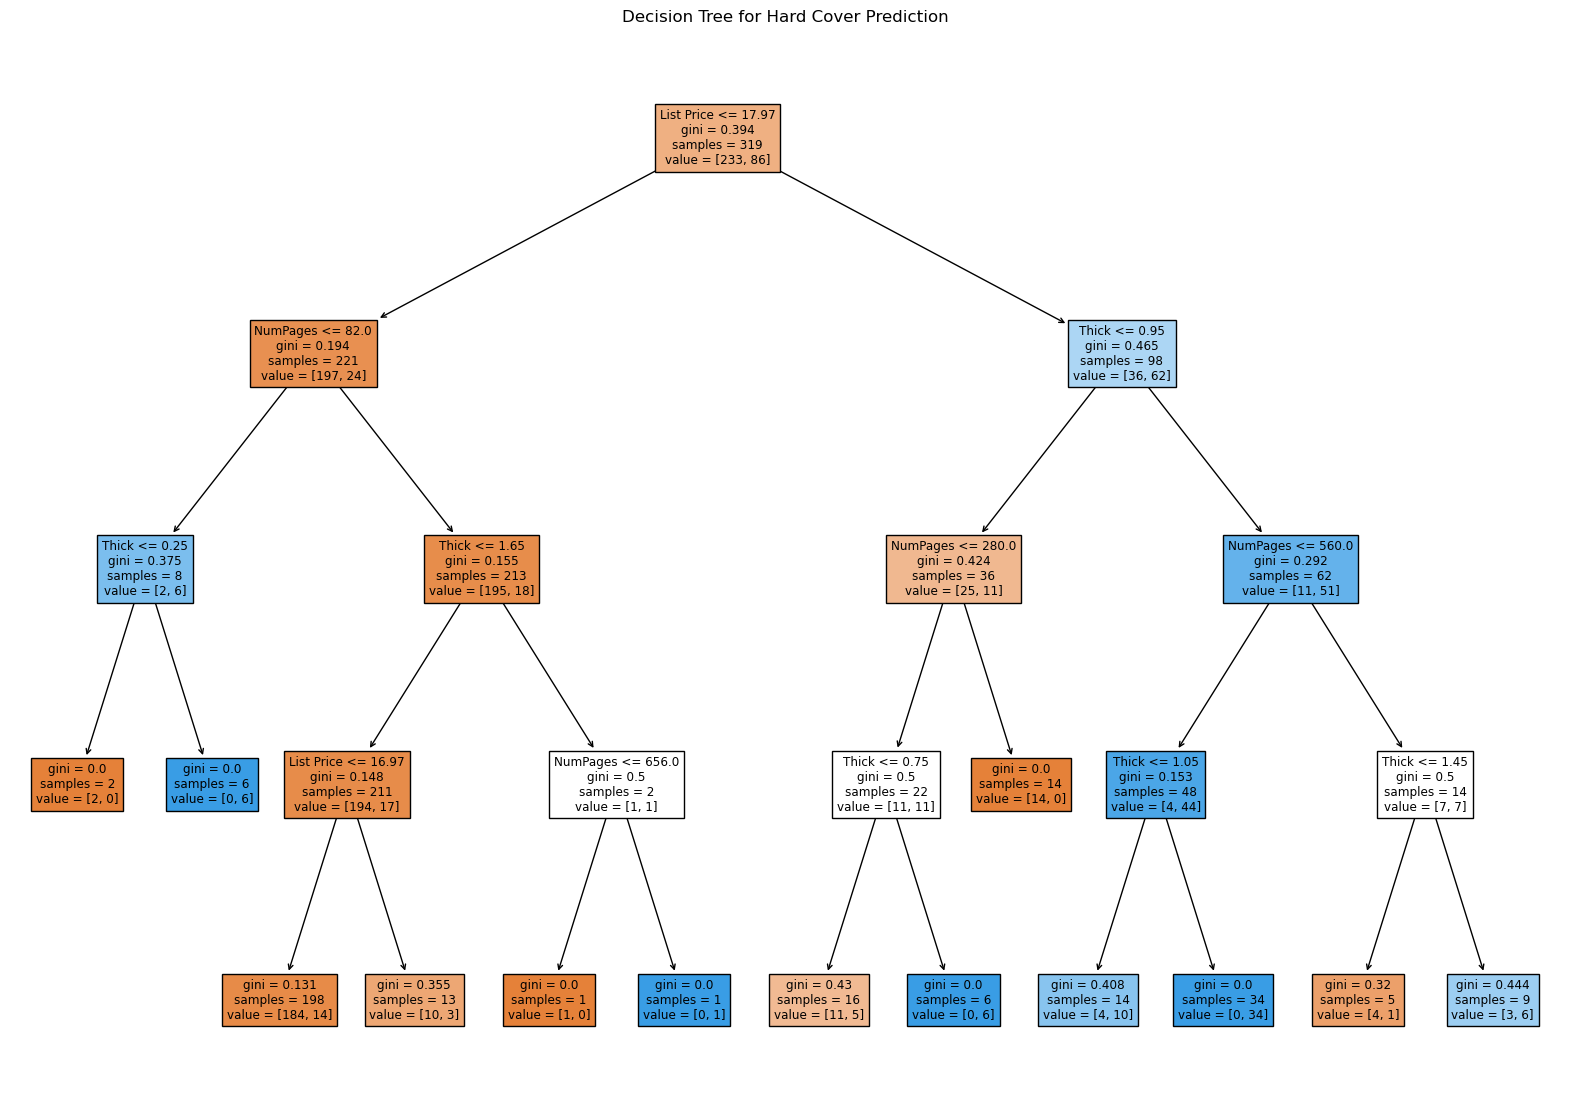

In [17]:
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)
plt.figure(figsize=(20, 14))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], filled=True)
plt.title("Decision Tree for Hard Cover Prediction")
plt.show()

## Question 6

Confusion Matrix for clf:
[[46  1]
 [ 4 13]]

Confusion Matrix for clf2:
[[46  1]
 [ 4 13]]


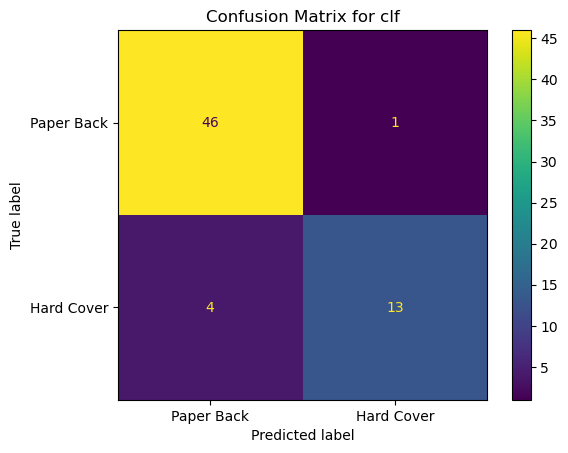

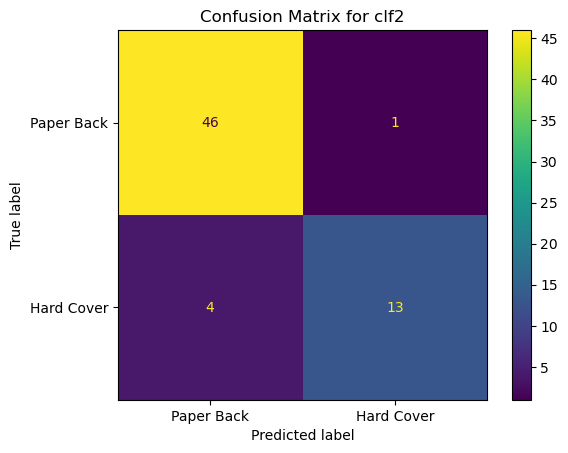

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Extract X_test and y_test from ab_reduced_noNaN_test
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Ensure these are the features used
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target variable

# Make predictions with clf and clf2
y_pred_clf = clf.predict(X_test)  # Model trained on a subset of features will still accept all as input
y_pred_clf2 = clf2.predict(X_test)

# Compute confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Display confusion matrices
print("Confusion Matrix for clf:")
print(cm_clf)

print("\nConfusion Matrix for clf2:")
print(cm_clf2)

# Optional: Visualize confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paper Back', 'Hard Cover'])
disp_clf.plot()
plt.title("Confusion Matrix for clf")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paper Back', 'Hard Cover'])
disp_clf2.plot()
plt.title("Confusion Matrix for clf2")
plt.show()


### Define hard cover as positive and paper back as negative.
### For clf:
- sensitivity = TP/(TP+FN) = 13/(13+1) = 0.929
- specificity = TN/(TN+FP) = 46/(46+4) = 0.920
- accuracy = TP/(TP+FP) = 4/(4+13) = 0.235
### For clf2:
- sensitivity = TP/(TP+FN) = 13/(13+1) = 0.929
- specificity = TN/(TN+FP) = 46/(46+4) = 0.920
- accuracy = TP/(TP+FP) = 4/(4+13) = 0.235

## Question 7

### For the first one, predictions are only based on the feature list price, while for the second one, the predictions are based on the freatures numpages, thick and list price.
### For clf and clf2, they use test data to evaluate the model, and for the model in the question, they use training data. The reason why clf and clf2 are better is because using test data can evaluate how well the model works for examples that have never been seen.